#Working on a grayscale image

##Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMG_PATH = "/content/image2.jpg"
img = cv2.imread(IMG_PATH)

(-0.5, 1399.5, 932.5, -0.5)

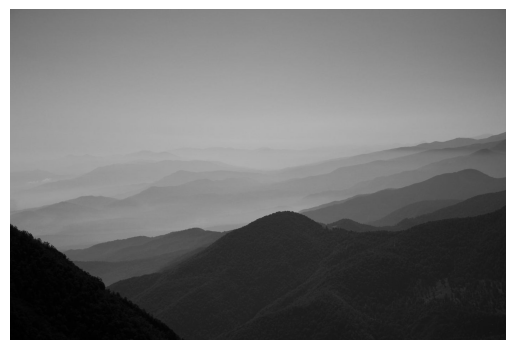

In [3]:
plt.imshow(img)
plt.axis('off')

In [4]:
img.shape

(933, 1400, 3)

##Grayscaling the Image

In [5]:
gimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(-0.5, 1399.5, 932.5, -0.5)

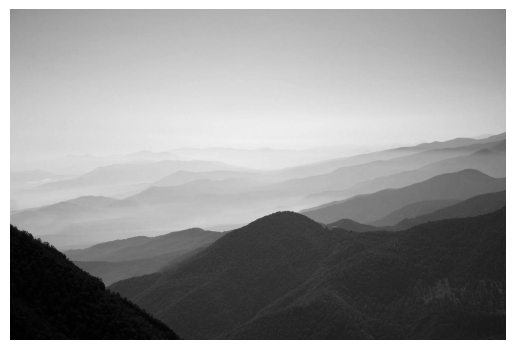

In [6]:
plt.imshow(gimg,cmap='gray')
plt.axis('off')

In [7]:
gimg.shape

(933, 1400)

In [8]:
np.min(gimg), np.max(gimg)

(0, 193)

##Applying Log Transformation

In [9]:
def log_transformation(img,c):
  log_img = c * np.log(1 + img)
  return np.array(log_img, dtype=np.uint8)

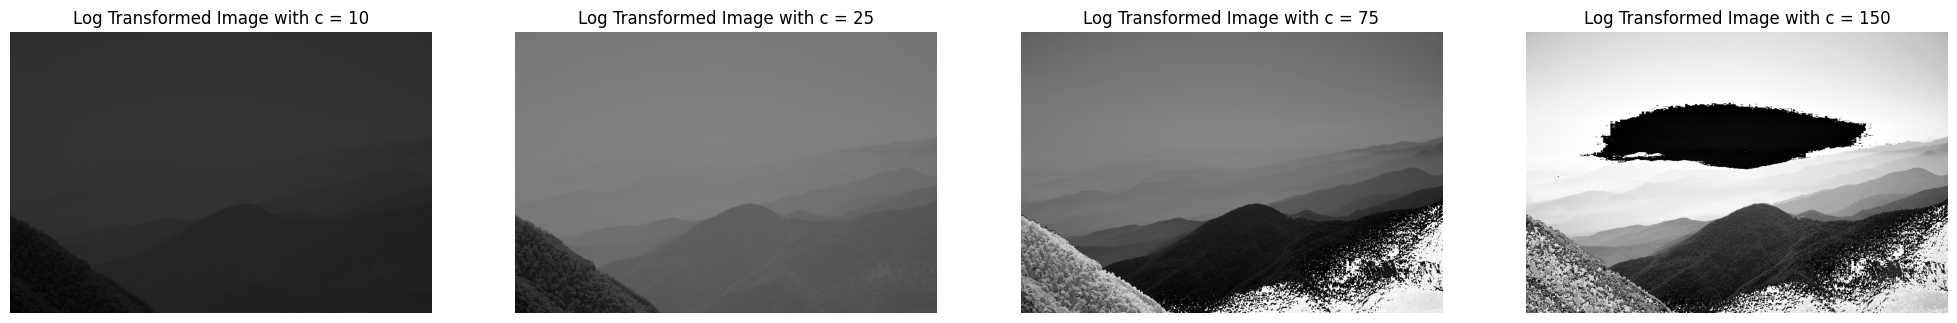

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
c_values = [10, 25, 75, 150]
fig, axes = plt.subplots(1, 4, figsize=(25, 20))

for i in range(len(c_values)):
  log_transformed_img = log_transformation(img, c_values[i])
  plt.figure()
  axes[i].imshow(log_transformed_img, cmap='gray')
  axes[i].set_title(f'Log Transformed Image with c = {c_values[i]}')
  axes[i].axis('off')

plt.show()

##Applying Power Law Transformation

In [11]:
def power_law_transformation(img, c, gamma):
  power_img = c * np.power(img, gamma)
  return np.array(power_img, dtype=np.uint8)

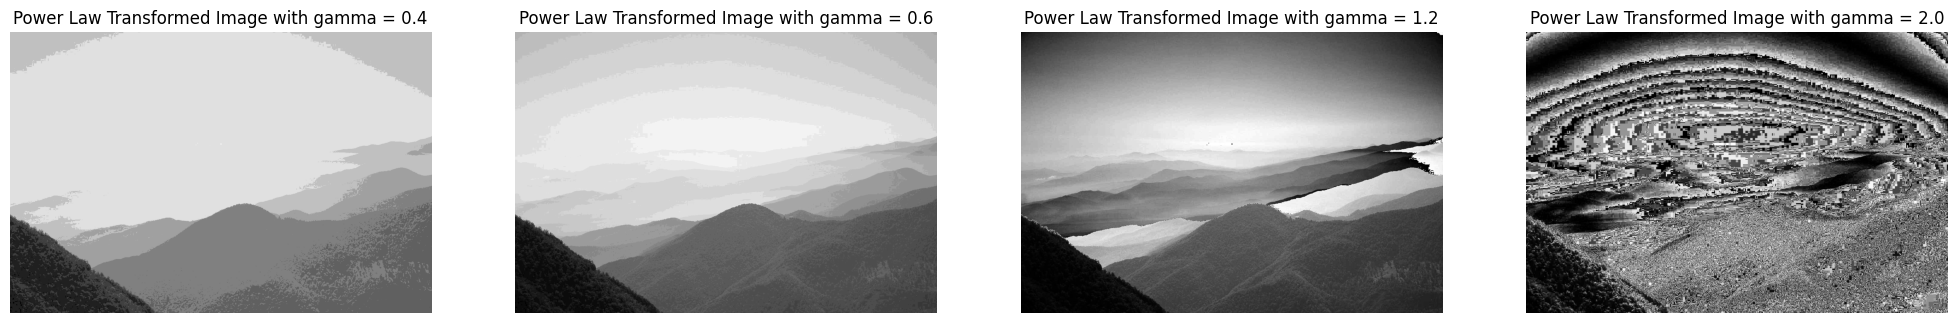

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
gamma_values = [0.4, 0.6, 1.2, 2.0]
fig, axes = plt.subplots(1, 4, figsize=(25, 20))

for i in range(len(gamma_values)):
  power_transformed_img = power_law_transformation(gimg, 1, gamma_values[i])
  plt.figure()
  axes[i].imshow(power_transformed_img, cmap='gray')
  axes[i].set_title(f'Power Law Transformed Image with gamma = {gamma_values[i]}')
  axes[i].axis('off')

plt.show()

## Applying Contrast Stretching

In [13]:
def contrast_stretching(img, r1, s1, r2, s2):
    new_img = img.copy()

    if len(img.shape) == 2:
        for i in range(new_img.shape[0]):
            for j in range(new_img.shape[1]):
                pixel = img[i, j]
                if pixel < r1:
                    new_pixel = (s1 / r1) * pixel
                elif r1 <= pixel <= r2:
                    new_pixel = ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
                else:
                    new_pixel = ((255 - s2) / (255 - r2)) * (pixel - r2) + s2
                new_img[i, j] = np.uint8(new_pixel)

    elif len(img.shape) == 3:
        for i in range(new_img.shape[0]):
            for j in range(new_img.shape[1]):
                pixel = img[i, j]
                for k in range(3):
                    if pixel[k] < r1:
                        new_pixel = (s1 / r1) * pixel[k]
                    elif r1 <= pixel[k] <= r2:
                        new_pixel = ((s2 - s1) / (r2 - r1)) * (pixel[k] - r1) + s1
                    else:
                        new_pixel = ((255 - s2) / (255 - r2)) * (pixel[k] - r2) + s2
                    new_img[i, j][k] = np.uint8(new_pixel)

    return new_img

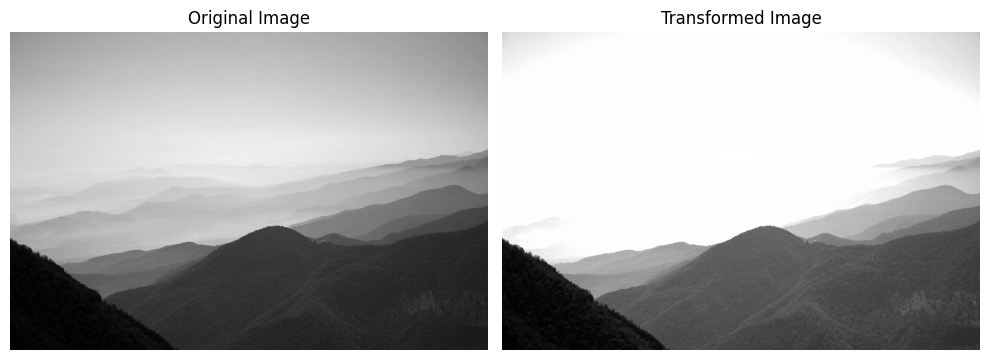

In [24]:
def subplot_images(original_image, transformed_image, title_original="Original Image", title_transformed="Transformed Image"):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(title_transformed)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

r1 = 30
s1 = 70
r2 = 130
s2 = 250
linear_transformed = contrast_stretching(gimg, r1, s1, r2, s2)
subplot_images(gimg, linear_transformed)

In [15]:
color_img = cv2.imread('image.jpg')

#RGB Image Transformation

##Reading a RGB Image


(-0.5, 699.5, 865.5, -0.5)

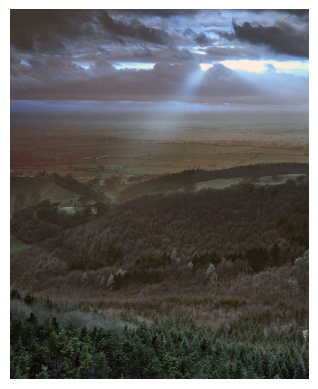

In [16]:
plt.imshow(color_img)
plt.axis('off')

##Log Transformation of the coloured image

<ipython-input-9-80ca82ea9f81>:2: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
<ipython-input-9-80ca82ea9f81>:3: RuntimeWarning: invalid value encountered in cast
  return np.array(log_img, dtype=np.uint8)


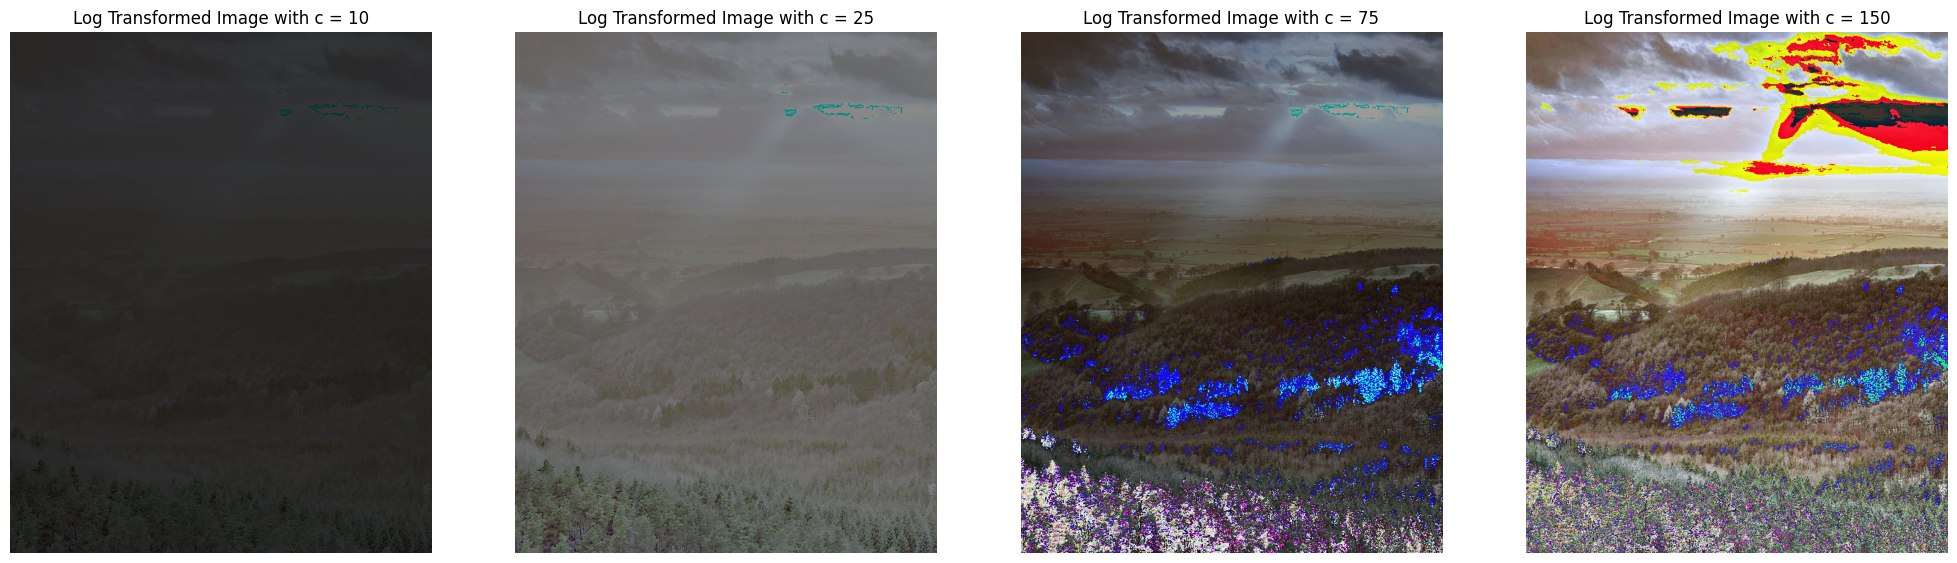

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
c_values = [10, 25, 75, 150]
fig, axes = plt.subplots(1, 4, figsize=(25, 20))

for i in range(len(c_values)):
  log_transformed_img = log_transformation(color_img, c_values[i])
  plt.figure()
  axes[i].imshow(log_transformed_img, cmap='gray')
  axes[i].set_title(f'Log Transformed Image with c = {c_values[i]}')
  axes[i].axis('off')

plt.show()

##Power Law Transformation of the coloured image

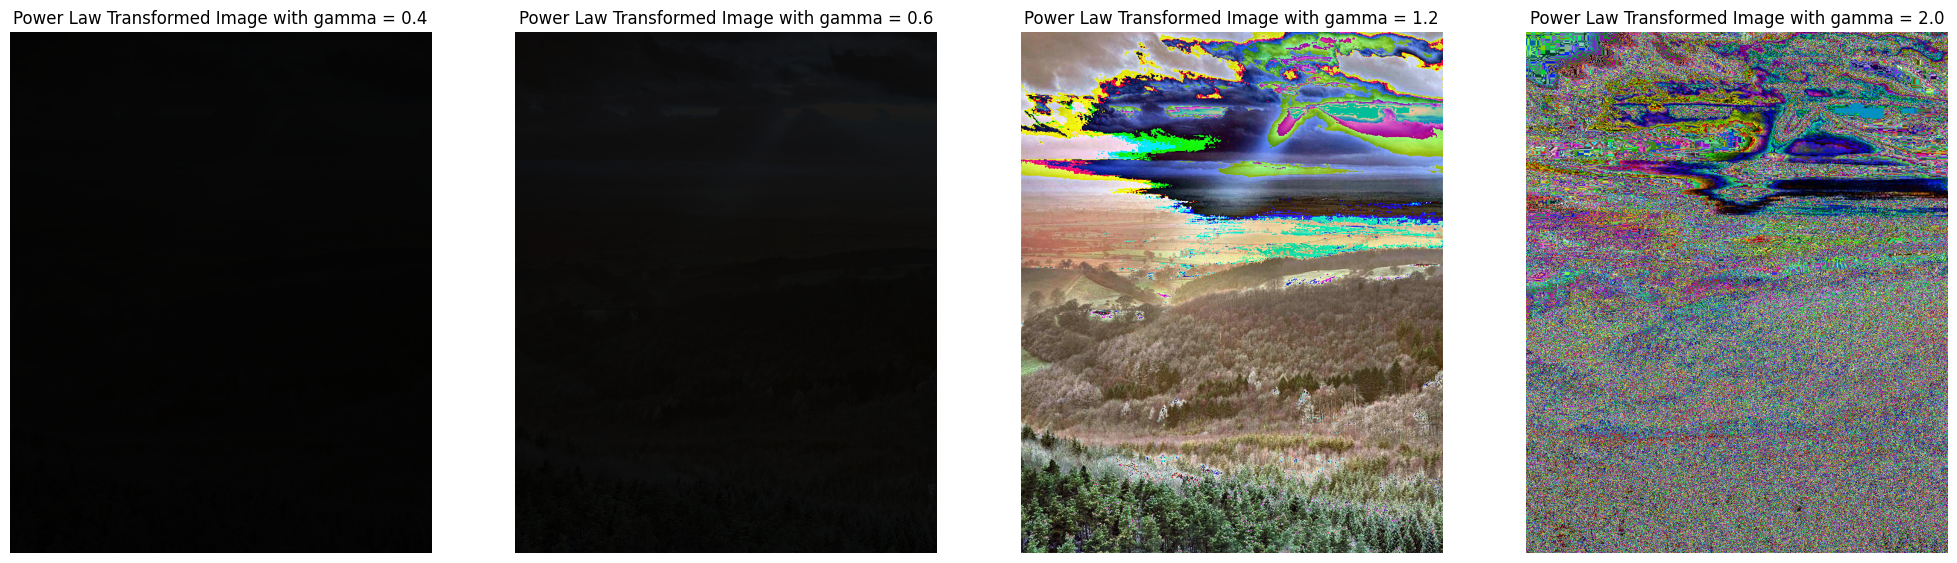

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
gamma_values = [0.4, 0.6, 1.2, 2.0]
fig, axes = plt.subplots(1, 4, figsize=(25, 20))

for i in range(len(gamma_values)):
  power_transformed_img = power_law_transformation(color_img, 1, gamma_values[i])
  plt.figure()
  axes[i].imshow(power_transformed_img, cmap='gray')
  axes[i].set_title(f'Power Law Transformed Image with gamma = {gamma_values[i]}')
  axes[i].axis('off')

plt.show()

##Contrast Stretching Transformation of the coloured image

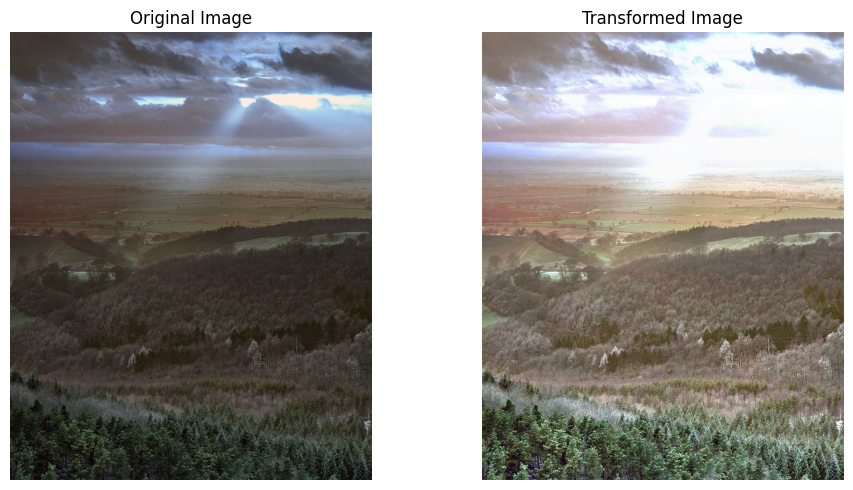

In [26]:
def subplot_images(original_image, transformed_image, title_original="Original Image", title_transformed="Transformed Image"):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(title_transformed)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

r1 = 30
s1 = 70
r2 = 130
s2 = 250
linear_transformed_color = contrast_stretching(color_img, r1, s1, r2, s2)
subplot_images(color_img, linear_transformed_color)

#Observations
Contrast Stretching: This technique greatly improved the clarity of the image by widening the range of intensity values, making the finer details much more discernible.

Log Transformation: Enhanced the visibility of darker areas, revealing details that were otherwise obscured. It was particularly useful for highlighting subtle features in the low-brightness regions of the image.

Power Law Transformation: Allowed for precise adjustment of brightness and contrast. By tuning the gamma parameter, we could either increase or decrease the image's brightness, giving us greater flexibility in image correction.

#Applications
Contrast Stretching:
Satellite Image Processing: Enhances the visibility of various features on the Earth's surface, allowing for easier identification of terrain, vegetation, or urban structures.

Log Transformation:
Medical Imaging: Ideal for highlighting details in dim regions of medical scans such as X-rays or MRIs, aiding in the detection of subtle anomalies that may not be immediately apparent in standard images.

Power Law Transformation:
Printing Industry: Utilized to adjust image tones, ensuring that printed materials accurately reflect the intended shades and contrast, thereby maintaining the integrity of the design.

#Conclusion
The experiment highlighted the effectiveness of different image enhancement methods like contrast stretching, log transformation, and power law transformation in improving the visual quality of images with low contrast. Each method demonstrated unique strengths, such as contrast stretching for overall enhancement, log transformation for emphasizing darker details, and power law transformation for precise control over brightness and contrast.